In [1]:
%load_ext autoreload
%autoreload 

In [2]:
import online_retail_analysis.utils.paths as path
from online_retail_analysis.features.build_features import Calculate_RFM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
df_cluster = pd.read_csv(path.data_processed_dir('data_clustering.csv'))

df_cluster

,CustomerID,Recency,MonetaryValue,Frequency,Cluster
0,"12,346.000",326,37.440,1,0
1,"12,347.000",2,"4,015.210",182,2
2,"12,348.000",75,732.620,31,1
3,"12,349.000",19,"1,389.150",73,1
4,"12,350.000",310,302.900,17,0
...,...,...,...,...,...
4333,"18,280.000",278,177.700,10,0
4334,"18,281.000",181,63.920,7,0
4335,"18,282.000",8,162.250,12,3
4336,"18,283.000",4,"2,040.770",721,2


<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

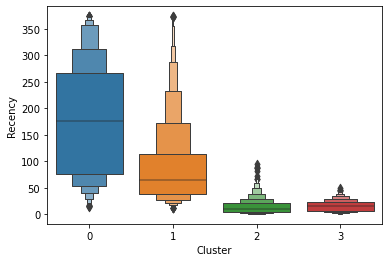

In [4]:
sns.boxenplot(x='Cluster', y='Recency', data=df_cluster)


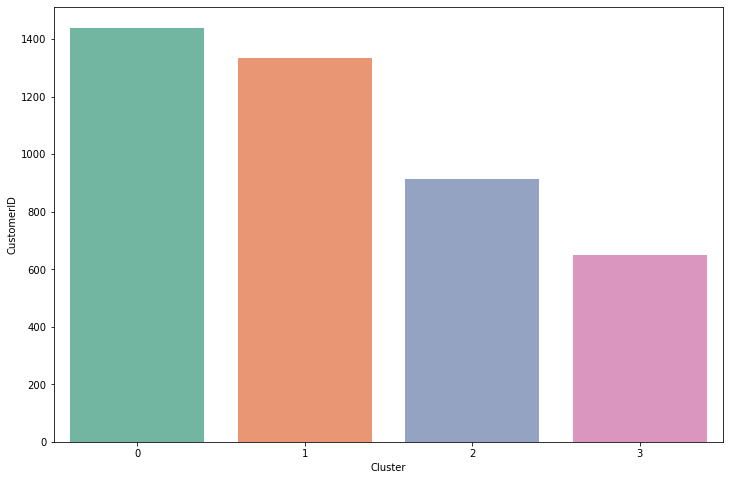

In [6]:
sq1=df_cluster.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Set2");

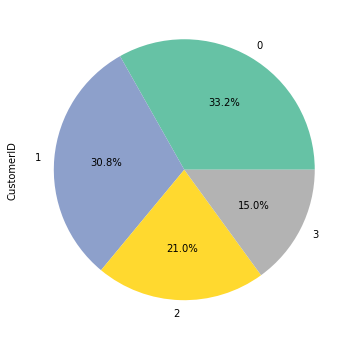

In [8]:
sq1=df_cluster.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).plot(kind='pie',cmap='Set2',figsize=(6,6),autopct='%1.1f%%')
plt.show()

In [15]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'MonetaryValue': ['mean']
    }).round(0)
    return df_new

In [19]:
# rfm_values(df_cluster).reset_index()
df_cluster.groupby(['Cluster'])[['Recency','Frequency','MonetaryValue']].quantile(q=[0.25, 0.5, 0.75])

Recency  Frequency  MonetaryValue
Cluster                                         
0       0.250   76.750      7.000        128.350
        0.500  177.000     13.000        214.290
        0.750  266.000     21.000        324.975
1       0.250   39.000     41.000        633.627
        0.500   65.500     62.000        889.675
        0.750  114.000     93.000      1,375.270
2       0.250    4.000    120.000      1,879.088
        0.500   10.000    186.000      2,886.220
        0.750   21.000    300.250      4,689.785
3       0.250    7.000     18.000        261.700
        0.500   15.000     30.000        406.670
        0.750   23.000     47.000        645.930

clus_2 = 'Loyal Customers'
clus_3 = 'Potential Costumers'
clus_1 = 'Customers Needing Attention'
clus_0 = 'Lost Customers'

Cluster 2 => Loyal Customers => Spend good money with us often and responsive to promotions.

Cluster 1 => Customer Need Attention => Above average recency, frequency and monetary values. May not have bought very recently though.

Cluster 3 => Potential Loyalist => Recent customers, but spent a good amount and bought more than once.

Cluster 0 => Lost Customer => Last purchase was long back, low spenders and low number of orders.

Recommendation
Based on the 4 clusters, we could formulate marketing strategies relevant to each cluster:

Cluster 2 => Loyal Customers => Upsell higher value products, ask for reviews, and engage them.
Cluster 1 => Customer Need Attention => Make limited time offers, recommend based on past purchases, share valuable resources, recommend popular products / renewals at discount, and reconnect with them.
Cluster 3 => Potential Loyalist => Offer membership / loyalty program, and recommend other products.
Cluster 0 => Lost Customer => Revive interest with reach out campaign, ignore otherwise, offer other relevant products and special discounts, and recreate brand value.